In [31]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [32]:
df_Data_Analyst = df[df['job_title_short'] == 'Data Analyst'].copy()

In [33]:
df_analyst_skills = df_Data_Analyst.explode("job_skills")

In [34]:
df_working = df_analyst_skills.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"),
    salary_avg = ("salary_year_avg", "median")
)
df_working

,skill_count,salary_avg
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [35]:
df_working = df_working.sort_values("skill_count", ascending=False)


In [39]:
df_working = df_working.head(10)

In [40]:
df_working

,skill_count,salary_avg
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


C:\Users\ma3\AppData\Local\Temp\ipykernel_17236\1152252823.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_working["skill_count"][i], df_working["salary_avg"][i], df_working.index[i])


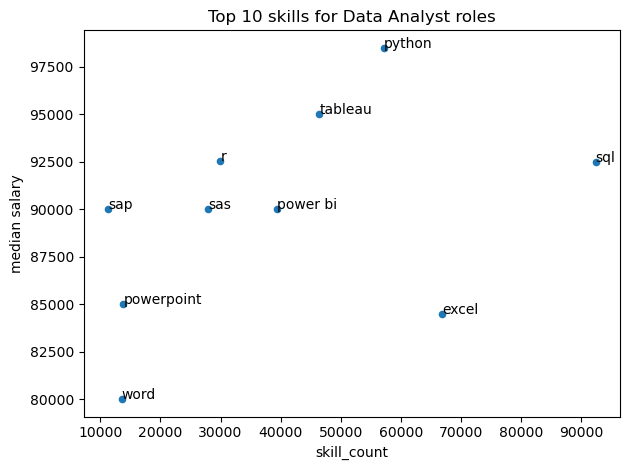

In [54]:
df_working.plot(kind="scatter", x="skill_count", y="salary_avg")
plt.xlabel("skill_count")
plt.ylabel("median salary")
plt.title("Top 10 skills for Data Analyst roles")
plt.tight_layout()
for i in range(len(df_working)):
    plt.text(df_working["skill_count"][i], df_working["salary_avg"][i], df_working.index[i])
plt.show()

In [ ]:
for i in range(len(df_working)):
    print()



sql
excel
python
tableau
power bi
r
sas
powerpoint
word
sap
